In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

In [4]:
from subprocess import check_output
print(check_output(["ls", "/Users/elbert/Downloads/input"]).decode("utf8"))

test.csv
train.csv



In [5]:
train = pd.read_csv("/Users/elbert/Downloads/input/train.csv")

In [8]:
print(train.shape)
train.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test = pd.read_csv("/Users/elbert/Downloads/input/test.csv")
print(test.shape)
type(test)

(28000, 784)


pandas.core.frame.DataFrame

In [12]:
Xtrain = train.ix[:, 1:].values.astype('float32')
Ytrain = train.ix[:, 0].values.astype('int32')
Xtest = test.values.astype('int32')

In [16]:
X_train = Xtrain.reshape(Xtrain.shape[0], 28, 28)

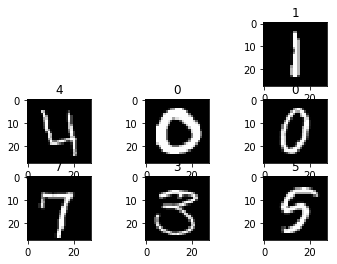

In [26]:
for i in range(2, 9):
    plot.subplot(330 + (i+1))
    plot.imshow(X_train[i], cmap = plot.get_cmap('gray'))
    plot.title(Ytrain[i]);

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = Xtest.reshape(Xtest.shape[0], 28, 28,1)

In [29]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(Ytrain)

In [30]:
y_train.shape

(42000, 10)

In [31]:
# 归一化
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px) / std_px

In [32]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [33]:
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [34]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [43]:
history=model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.n)

Epoch 1/1
   84/37800 [..............................] - ETA: 75s - loss: 0.2017 - acc: 0.9451

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_steps=4200, validation_data=<keras.pre..., epochs=1)`
  


37800/37800 [==============================] - 66s - loss: 0.2037 - acc: 0.9459 - val_loss: 0.4055 - val_acc: 0.9028


In [40]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)
history=model.fit_generator(batches, batches.n, nb_epoch=1)

Epoch 1/1
   84/37800 [..............................] - ETA: 73s - loss: 0.2221 - acc: 0.9377

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, epochs=1)`
  after removing the cwd from sys.path.


37800/37800 [==============================] - 67s - loss: 0.2159 - acc: 0.9417    


In [41]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)